In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("/content/satgpa.csv")
df

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
0,1,65,62,127,3.40,3.18
1,2,58,64,122,4.00,3.33
2,2,56,60,116,3.75,3.25
3,1,42,53,95,3.75,2.42
4,1,55,52,107,4.00,2.63
...,...,...,...,...,...,...
995,2,50,50,100,3.70,2.19
996,1,54,54,108,3.30,1.50
997,1,56,58,114,3.50,3.17
998,1,55,65,120,2.30,1.94


In [ ]:
df_ready = df.drop('sex', axis=1).drop('sat_sum', axis=1)
df_ready

,sat_v,sat_m,hs_gpa,fy_gpa
0,65,62,3.40,3.18
1,58,64,4.00,3.33
2,56,60,3.75,3.25
3,42,53,3.75,2.42
4,55,52,4.00,2.63
...,...,...,...,...
995,50,50,3.70,2.19
996,54,54,3.30,1.50
997,56,58,3.50,3.17
998,55,65,2.30,1.94


In [ ]:
X = df[['sat_v', 'sat_m', 'hs_gpa']]
y = df['fy_gpa']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.0163843 , 0.01263003, 0.5668498 ])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
sqr_errors = []

for predicted, actual in zip(y_pred, y_test):
    error = predicted - actual
    sqr_errors.append(error ** 2)

mse = np.mean(sqr_errors)

rmse = np.sqrt(mse)

print("Mean Square Error: %0.4f" % mse)
print("Root-Mean Square Error: %0.4f" % rmse)

Mean Square Error: 0.3449
Root-Mean Square Error: 0.5873


In [ ]:
score_coeff = model.score(X_test, y_test)
print("Coefficient of Determination:", score_coeff)

Coefficient of Determination: 0.3774786667607257


Text(0, 0.5, 'Actual GPA')

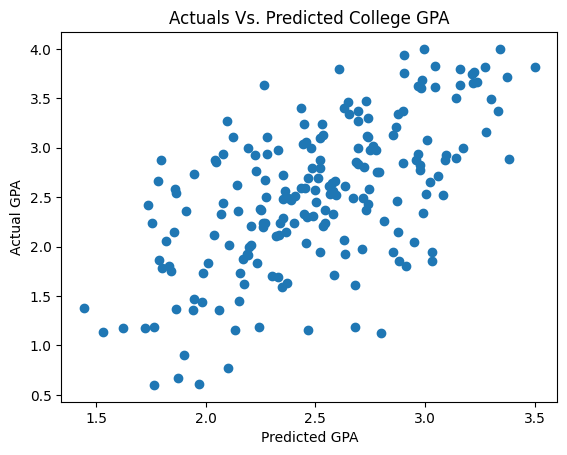

In [ ]:
plt.scatter(y_pred, y_test)
plt.title('Actuals Vs. Predicted College GPA')
plt.xlabel('Predicted GPA')
plt.ylabel('Actual GPA')

In [ ]:
results = pd.DataFrame({
    'actual_gpa': y_test,
    'predicted_gpa': y_pred,
    'error': y_test - y_pred
})

worst_preds = results.reindex(results['error'].abs().sort_values(ascending=False).index)
worst_preds.head()

,actual_gpa,predicted_gpa,error
660,1.13,2.798234,-1.668234
327,1.19,2.682453,-1.492453
211,3.63,2.264824,1.365176
528,0.61,1.971322,-1.361322
294,0.77,2.101053,-1.331053
